In [1]:
import requests
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#https://api.covid19india.org/documentation/csv/
state_cases_url = "https://api.covid19india.org/csv/latest/state_wise.csv"
state_daily_cases_url = "https://api.covid19india.org/csv/latest/state_wise_daily.csv"
state_daily_tests_url = "https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv"

In [3]:
df_state_cases_url = pd.read_csv(state_cases_url)
df_state_daily_cases_url = pd.read_csv(state_daily_cases_url)
df_state_daily_tests_url = pd.read_csv(state_daily_tests_url)

In [4]:
df_state_cases_url.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,3660480,2815153,65128,779614,31/08/2020 20:27:22,585,TT,41307,42211,511,NaN
1,Maharashtra,780689,562401,24399,193548,30/08/2020 21:23:26,341,MH,0,0,0,341 cases are marked as non-covid deaths in MH...
2,Tamil Nadu,428041,368141,7325,52575,30/08/2020 21:30:24,0,TN,5956,6008,94,[July 22]: 444 backdated deceased entries adde...
3,Andhra Pradesh,434771,330526,3969,100276,31/08/2020 18:18:28,0,AP,10004,8772,85,Total includes patients from other states and ...
4,Karnataka,342423,249467,5702,87235,31/08/2020 19:38:32,19,KA,6495,7238,113,NaN


In [5]:
df_state_daily_cases_url.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [6]:
df_state_daily_cases_url.describe()


,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.0,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000
mean,12657.903922,11.219608,1471.382353,13.456863,372.354902,496.090196,12.750980,91.498039,8.600000,0.0,...,175.837255,286.986275,5.517647,1551.860784,420.364706,36.574510,777.643137,63.717647,576.30000,0.000000
std,20379.168200,29.507863,3102.814213,29.583373,709.525073,979.073284,31.741013,206.388981,15.794008,0.0,...,369.252251,422.285481,15.637931,2252.210585,704.777085,75.150598,1453.065932,124.629788,990.82163,177.064549
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-3.000000,0.000000,-1.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,-19.00000,-1295.000000
25%,209.250000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,...,2.000000,6.000000,0.000000,13.000000,4.000000,0.000000,10.250000,0.000000,7.00000,0.000000
50%,1120.500000,0.000000,59.000000,0.000000,4.000000,14.500000,1.000000,2.500000,0.000000,0.0,...,16.000000,82.000000,0.000000,109.500000,16.000000,0.000000,76.500000,3.000000,53.00000,0.000000
75%,15274.000000,2.750000,464.250000,5.000000,282.500000,255.500000,7.000000,86.250000,11.750000,0.0,...,124.250000,336.750000,1.000000,2665.500000,799.250000,34.000000,597.500000,67.500000,520.25000,0.000000
max,78908.000000,149.000000,12750.000000,157.000000,4593.000000,4140.000000,261.000000,1513.000000,72.000000,0.0,...,2226.000000,2122.000000,149.000000,7758.000000,3018.000000,509.000000,6175.000000,728.000000,3314.00000,1043.000000


In [7]:
df_state_daily_tests_url.head()

,Updated On,State,RT PCR Tests,Antigen Tests,Other Tests,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,...,Num Calls State Helpline,Source1,Source2,Source3,Test positivity rate,Tests per thousand,Tests per million,Tests per positive case,Population NCP 2019 Projection,Unnamed: 31
0,17/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,1403.0,Samples Sent,12.0,1210,181.0,...,NaN,https://t.me/indiacovid/2550,NaN,NaN,0.86%,3.53,3534.0,117,397000.0,NaN
1,24/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,2679.0,Samples Sent,27.0,NaN,246.0,...,280.0,https://t.me/indiacovid/3147?single,NaN,NaN,1.01%,6.75,6748.0,99,397000.0,NaN
2,27/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,2848.0,Samples Sent,33.0,NaN,106.0,...,298.0,https://t.me/indiacovid/3365?single,NaN,NaN,1.16%,7.17,7174.0,86,397000.0,NaN
3,01/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,3754.0,Samples Sent,33.0,NaN,199.0,...,340.0,https://t.me/indiacovid/3781,NaN,NaN,0.88%,9.46,9456.0,114,397000.0,NaN
4,16/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,6677.0,Samples Sent,33.0,NaN,136.0,...,471.0,https://t.me/indiacovid/4925,NaN,NaN,0.49%,16.82,16819.0,202,397000.0,NaN


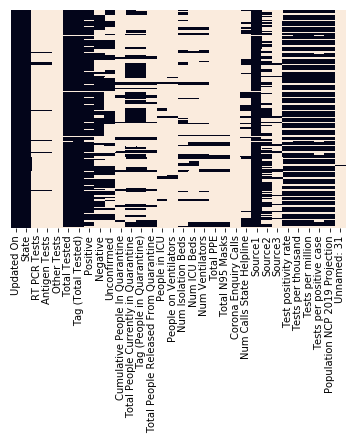

In [7]:
sns.heatmap(df_state_daily_tests_url.isnull(),yticklabels=False,cbar=False)

In [8]:
test = df_state_daily_tests_url

In [9]:

test['date1'] = pd.to_datetime(test.loc[test['Updated On'].astype(str).str.extract('.*(\d{2})', expand = False).astype(int)>12, 
                     'Updated On'], format='%d/%m/%Y' )

In [10]:
test.head()

,Updated On,State,RT PCR Tests,Antigen Tests,Other Tests,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,...,Source1,Source2,Source3,Test positivity rate,Tests per thousand,Tests per million,Tests per positive case,Population NCP 2019 Projection,Unnamed: 31,date1
0,17/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,1403.0,Samples Sent,12.0,1210,181.0,...,https://t.me/indiacovid/2550,NaN,NaN,0.86%,3.53,3534.0,117,397000.0,NaN,2020-04-17
1,24/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,2679.0,Samples Sent,27.0,NaN,246.0,...,https://t.me/indiacovid/3147?single,NaN,NaN,1.01%,6.75,6748.0,99,397000.0,NaN,2020-04-24
2,27/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,2848.0,Samples Sent,33.0,NaN,106.0,...,https://t.me/indiacovid/3365?single,NaN,NaN,1.16%,7.17,7174.0,86,397000.0,NaN,2020-04-27
3,01/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,3754.0,Samples Sent,33.0,NaN,199.0,...,https://t.me/indiacovid/3781,NaN,NaN,0.88%,9.46,9456.0,114,397000.0,NaN,2020-05-01
4,16/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,6677.0,Samples Sent,33.0,NaN,136.0,...,https://t.me/indiacovid/4925,NaN,NaN,0.49%,16.82,16819.0,202,397000.0,NaN,2020-05-16


In [17]:
test['date2'] = pd.to_datetime(test.loc[test['Updated On'].astype(str).str.extract('.*(\d{2})', expand = False).astype(int)<=12, 
                     'Updated On'], format='%Y-%d-%m')

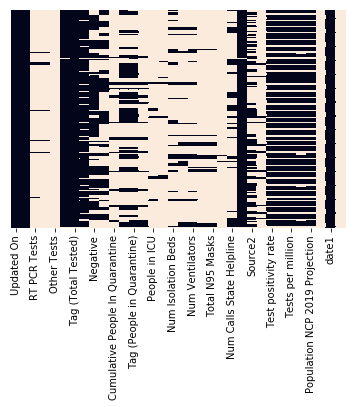

In [19]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [22]:
test1['data1']=pd.to_datetime(test['Updated On'])

In [21]:
test1=df_state_daily_tests_url

In [23]:
test1.head()

,Updated On,State,RT PCR Tests,Antigen Tests,Other Tests,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,...,Source3,Test positivity rate,Tests per thousand,Tests per million,Tests per positive case,Population NCP 2019 Projection,Unnamed: 31,date1,date2,data1
0,17/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,1403.0,Samples Sent,12.0,1210,181.0,...,NaN,0.86%,3.53,3534.0,117,397000.0,NaN,2020-04-17,NaT,2020-04-17
1,24/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,2679.0,Samples Sent,27.0,NaN,246.0,...,NaN,1.01%,6.75,6748.0,99,397000.0,NaN,2020-04-24,NaT,2020-04-24
2,27/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,2848.0,Samples Sent,33.0,NaN,106.0,...,NaN,1.16%,7.17,7174.0,86,397000.0,NaN,2020-04-27,NaT,2020-04-27
3,01/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,3754.0,Samples Sent,33.0,NaN,199.0,...,NaN,0.88%,9.46,9456.0,114,397000.0,NaN,2020-05-01,NaT,2020-01-05
4,16/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,6677.0,Samples Sent,33.0,NaN,136.0,...,NaN,0.49%,16.82,16819.0,202,397000.0,NaN,2020-05-16,NaT,2020-05-16


In [25]:
test1.dtypes

Updated On                                       object
State                                            object
RT PCR Tests                                    float64
Antigen Tests                                   float64
Other Tests                                     float64
Total Tested                                    float64
Tag (Total Tested)                               object
Positive                                        float64
Negative                                         object
Unconfirmed                                     float64
Cumulative People In Quarantine                 float64
Total People Currently in Quarantine            float64
Tag (People in Quarantine)                       object
Total People Released From Quarantine           float64
People in ICU                                   float64
People on Ventilators                           float64
Num Isolation Beds                              float64
Num ICU Beds                                    

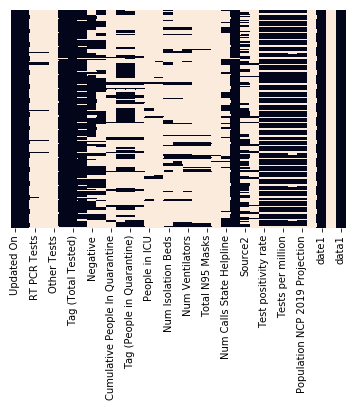

In [33]:
sns.heatmap(test1.isnull(),yticklabels=False,cbar=False)

In [34]:
test1

,Updated On,State,RT PCR Tests,Antigen Tests,Other Tests,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,...,Source3,Test positivity rate,Tests per thousand,Tests per million,Tests per positive case,Population NCP 2019 Projection,Unnamed: 31,date1,date2,data1
0,17/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,1403.0,Samples Sent,12.0,1210,181.0,...,NaN,0.86%,3.53,3534.0,117,397000.0,NaN,2020-04-17,NaT,2020-04-17
1,24/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,2679.0,Samples Sent,27.0,NaN,246.0,...,NaN,1.01%,6.75,6748.0,99,397000.0,NaN,2020-04-24,NaT,2020-04-24
2,27/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,2848.0,Samples Sent,33.0,NaN,106.0,...,NaN,1.16%,7.17,7174.0,86,397000.0,NaN,2020-04-27,NaT,2020-04-27
3,01/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,3754.0,Samples Sent,33.0,NaN,199.0,...,NaN,0.88%,9.46,9456.0,114,397000.0,NaN,2020-05-01,NaT,2020-01-05
4,16/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,6677.0,Samples Sent,33.0,NaN,136.0,...,NaN,0.49%,16.82,16819.0,202,397000.0,NaN,2020-05-16,NaT,2020-05-16
5,19/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,6965.0,Samples Sent,33.0,NaN,117.0,...,NaN,0.47%,17.54,17544.0,211,397000.0,NaN,2020-05-19,NaT,2020-05-19
6,20/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,7082.0,Samples Sent,33.0,NaN,117.0,...,NaN,0.47%,17.84,17839.0,215,397000.0,NaN,2020-05-20,NaT,2020-05-20
7,21/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,7167.0,Samples Sent,33.0,NaN,85.0,...,NaN,0.46%,18.05,18053.0,217,397000.0,NaN,2020-05-21,NaT,2020-05-21
8,22/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,7263.0,Samples Sent,33.0,NaN,96.0,...,NaN,0.45%,18.29,18295.0,220,397000.0,NaN,2020-05-22,NaT,2020-05-22
9,23/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,7327.0,Samples Sent,33.0,NaN,61.0,...,NaN,0.45%,18.46,18456.0,222,397000.0,NaN,2020-05-23,NaT,2020-05-23


In [36]:
a=test['Updated On'].astype(str).str.extract('.*(\d{2})')

In [37]:
a

,0
0,20
1,20
2,20
3,20
4,20
5,20
6,20
7,20
8,20
9,20


In [11]:
test.dtypes

Updated On                                       object
State                                            object
RT PCR Tests                                    float64
Antigen Tests                                   float64
Other Tests                                     float64
Total Tested                                    float64
Tag (Total Tested)                               object
Positive                                        float64
Negative                                         object
Unconfirmed                                     float64
Cumulative People In Quarantine                 float64
Total People Currently in Quarantine            float64
Tag (People in Quarantine)                       object
Total People Released From Quarantine           float64
People in ICU                                   float64
People on Ventilators                           float64
Num Isolation Beds                              float64
Num ICU Beds                                    

In [40]:
df_state_cases_url['State']

0                                        Total
1                                  Maharashtra
2                                   Tamil Nadu
3                               Andhra Pradesh
4                                    Karnataka
5                                        Delhi
6                                Uttar Pradesh
7                                  West Bengal
8                                        Bihar
9                                    Telangana
10                                     Gujarat
11                                       Assam
12                                   Rajasthan
13                                      Odisha
14                                     Haryana
15                              Madhya Pradesh
16                                      Kerala
17                                      Punjab
18                           Jammu and Kashmir
19                                   Jharkhand
20                                Chhattisgarh
21           

In [12]:
df_state_case = df_state_cases_url[df_state_cases_url['State']!="Total"][[
    'State', 'State_code', 'Confirmed', 'Recovered', 'Deaths', 'Active']]

In [14]:
df_state_case.head()

,State,State_code,Confirmed,Recovered,Deaths,Active
1,Maharashtra,MH,780689,562401,24399,193548
2,Tamil Nadu,TN,428041,368141,7325,52575
3,Andhra Pradesh,AP,434771,330526,3969,100276
4,Karnataka,KA,342423,249467,5702,87235
5,Delhi,DL,174748,155678,4444,14626


In [16]:
#Defining percentage measures of deaths & active cases
df_state_case['death_rate']= df_state_case['Deaths']*100/df_state_case['Confirmed']
df_state_case['death_rec']= df_state_case['Deaths']*100/df_state_case['Recovered']
df_state_case['active_rate']= df_state_case['Active']*100/df_state_case['Confirmed']

In [17]:
df_state_case.head()

,State,State_code,Confirmed,Recovered,Deaths,Active,death_rate,death_rec,active_rate
1,Maharashtra,MH,780689,562401,24399,193548,3.125316,4.338364,24.791947
2,Tamil Nadu,TN,428041,368141,7325,52575,1.711285,1.989727,12.282702
3,Andhra Pradesh,AP,434771,330526,3969,100276,0.912894,1.200813,23.064096
4,Karnataka,KA,342423,249467,5702,87235,1.665192,2.285673,25.475800
5,Delhi,DL,174748,155678,4444,14626,2.543091,2.854610,8.369767


In [20]:
    df_state_daily_cases_url.describe()

,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.0,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000
mean,12657.903922,11.219608,1471.382353,13.456863,372.354902,496.090196,12.750980,91.498039,8.600000,0.0,...,175.837255,286.986275,5.517647,1551.860784,420.364706,36.574510,777.643137,63.717647,576.30000,0.000000
std,20379.168200,29.507863,3102.814213,29.583373,709.525073,979.073284,31.741013,206.388981,15.794008,0.0,...,369.252251,422.285481,15.637931,2252.210585,704.777085,75.150598,1453.065932,124.629788,990.82163,177.064549
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-3.000000,0.000000,-1.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,-19.00000,-1295.000000
25%,209.250000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,...,2.000000,6.000000,0.000000,13.000000,4.000000,0.000000,10.250000,0.000000,7.00000,0.000000
50%,1120.500000,0.000000,59.000000,0.000000,4.000000,14.500000,1.000000,2.500000,0.000000,0.0,...,16.000000,82.000000,0.000000,109.500000,16.000000,0.000000,76.500000,3.000000,53.00000,0.000000
75%,15274.000000,2.750000,464.250000,5.000000,282.500000,255.500000,7.000000,86.250000,11.750000,0.0,...,124.250000,336.750000,1.000000,2665.500000,799.250000,34.000000,597.500000,67.500000,520.25000,0.000000
max,78908.000000,149.000000,12750.000000,157.000000,4593.000000,4140.000000,261.000000,1513.000000,72.000000,0.0,...,2226.000000,2122.000000,149.000000,7758.000000,3018.000000,509.000000,6175.000000,728.000000,3314.00000,1043.000000


In [23]:
df_state_cases_url.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,3660480,2815153,65128,779614,31/08/2020 20:27:22,585,TT,41307,42211,511,NaN
1,Maharashtra,780689,562401,24399,193548,30/08/2020 21:23:26,341,MH,0,0,0,341 cases are marked as non-covid deaths in MH...
2,Tamil Nadu,428041,368141,7325,52575,30/08/2020 21:30:24,0,TN,5956,6008,94,[July 22]: 444 backdated deceased entries adde...
3,Andhra Pradesh,434771,330526,3969,100276,31/08/2020 18:18:28,0,AP,10004,8772,85,Total includes patients from other states and ...
4,Karnataka,342423,249467,5702,87235,31/08/2020 19:38:32,19,KA,6495,7238,113,NaN


In [22]:
df_state_case.head()

,State,State_code,Confirmed,Recovered,Deaths,Active,death_rate,death_rec,active_rate
1,Maharashtra,MH,780689,562401,24399,193548,3.125316,4.338364,24.791947
2,Tamil Nadu,TN,428041,368141,7325,52575,1.711285,1.989727,12.282702
3,Andhra Pradesh,AP,434771,330526,3969,100276,0.912894,1.200813,23.064096
4,Karnataka,KA,342423,249467,5702,87235,1.665192,2.285673,25.475800
5,Delhi,DL,174748,155678,4444,14626,2.543091,2.854610,8.369767


In [24]:
df_state_daily_cases_url.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [25]:
df_state_daily_cases_url['Date']= pd.to_datetime(df_state_daily_cases_url['Date'])

In [27]:
df_state_daily_cases_url.dtypes

Date      datetime64[ns]
Status            object
TT                 int64
AN                 int64
AP                 int64
AR                 int64
AS                 int64
BR                 int64
CH                 int64
CT                 int64
DN                 int64
DD                 int64
DL                 int64
GA                 int64
GJ                 int64
HR                 int64
HP                 int64
JK                 int64
JH                 int64
KA                 int64
KL                 int64
LA                 int64
LD                 int64
MP                 int64
MH                 int64
MN                 int64
ML                 int64
MZ                 int64
NL                 int64
OR                 int64
PY                 int64
PB                 int64
RJ                 int64
SK                 int64
TN                 int64
TG                 int64
TR                 int64
UP                 int64
UT                 int64
WB                 int64


In [ ]:
df_state_daily_cases_raw_melt = pd.merge(df_state_daily_cases_raw_melt, df_map, left_on='variable', right_on='State_code')
df_state_daily_cases_raw_melt.drop(columns=['variable'], inplace=True)

In [35]:
df_map = df_state_case[['State', 'State_code']]

In [36]:
df_map.head()

,State,State_code
1,Maharashtra,MH
2,Tamil Nadu,TN
3,Andhra Pradesh,AP
4,Karnataka,KA
5,Delhi,DL


In [37]:
df_state_daily_cases_url.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,2020-03-14,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,2020-03-14,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,2020-03-14,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-15,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,2020-03-15,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [40]:
df_state_daily_cases_raw_melt = df_state_daily_cases_url.melt(id_vars=['Date','Status'])

In [41]:
df_state_daily_cases_raw_melt.head()

,Date,Status,variable,value
0,2020-03-14,Confirmed,TT,81
1,2020-03-14,Recovered,TT,9
2,2020-03-14,Deceased,TT,2
3,2020-03-15,Confirmed,TT,27
4,2020-03-15,Recovered,TT,4


In [42]:
df_state_daily_cases_raw_melt = pd.merge(df_state_daily_cases_raw_melt, df_map, left_on='variable', right_on='State_code')

In [43]:
df_state_daily_cases_raw_melt.head()

,Date,Status,variable,value,State,State_code
0,2020-03-14,Confirmed,AN,0,Andaman and Nicobar Islands,AN
1,2020-03-14,Recovered,AN,0,Andaman and Nicobar Islands,AN
2,2020-03-14,Deceased,AN,0,Andaman and Nicobar Islands,AN
3,2020-03-15,Confirmed,AN,0,Andaman and Nicobar Islands,AN
4,2020-03-15,Recovered,AN,0,Andaman and Nicobar Islands,AN
